In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('customer_churn_dataset-training-master.csv')


In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [6]:
df.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [7]:
df['Subscription Type'].value_counts()

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

In [8]:
df.head(1)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0


In [9]:
df2=df[['Age','Gender','Tenure','Usage Frequency','Support Calls','Payment Delay','Subscription Type','Contract Length','Total Spend','Last Interaction','Churn']]

In [10]:
df.head(1)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0


In [13]:
object_columns=df2[['Gender','Subscription Type','Contract Length','Churn']]

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
encoders = []  

for col in object_columns.columns:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    encoders.append(le)

C:\Users\T440\AppData\Local\Temp\ipykernel_10008\3233612348.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = le.fit_transform(df2[col])
C:\Users\T440\AppData\Local\Temp\ipykernel_10008\3233612348.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = le.fit_transform(df2[col])
C:\Users\T440\AppData\Local\Temp\ipykernel_10008\3233612348.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [14]:
df2.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1


In [15]:
df2.isna().sum()

Age                  1
Gender               0
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    0
Contract Length      0
Total Spend          1
Last Interaction     1
Churn                0
dtype: int64

In [16]:
df_clean=df2.fillna(df2.mean())

In [17]:
df_clean.isna().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

<Axes: >

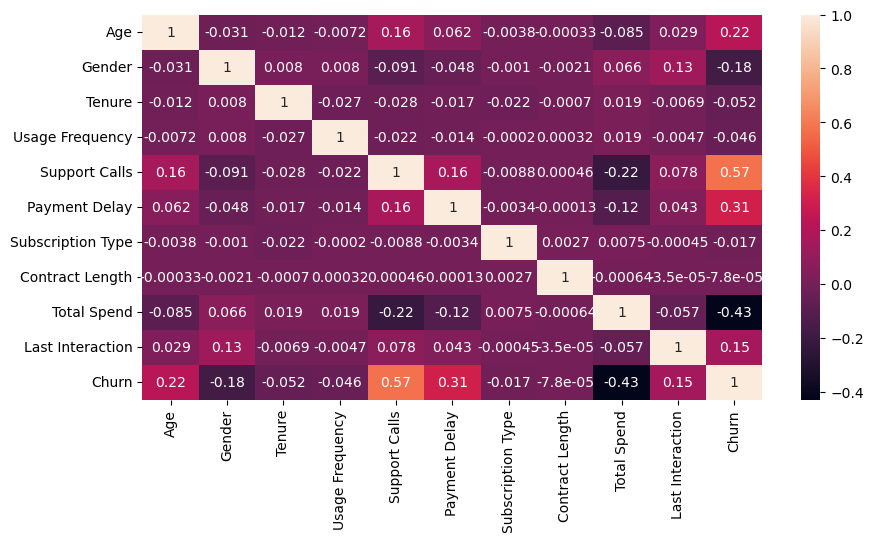

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(df_clean.corr(),annot=True)

In [19]:
x=df_clean[list(df_clean.columns)[0:-1]]

In [20]:
y=df_clean['Churn']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

C:\Users\T440\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.metrics import accuracy_score
print('accuray',accuracy_score(y_test,pred)*100)

accuray 85.25217391304348


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(x_train,y_train)
pred1=model1.predict(x_test)

In [ ]:
# print('accuracy',round(accuracy_score(y_test,pred1)*100,2))
acc = accuracy_score(y_test, pred1) * 100

print('accuracy', acc)

In [ ]:
import joblib
joblib.dump(model1,'churn_model.pkl')
joblib.dump(acc, 'model_accuracy.pkl') 
joblib.dump(encoders,'labelencoders.pkl')